In [11]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from models.load import get_classification_models, get_regression_models
from experiments.evaluation import ModelEvaluationExperiment
from datasets.load import load_regression_datasets, load_classification_datasets
from experiments.regularization import ModelTunerCV
from models.elm import ELMClassifier
from models.rbf import RBFClassifier

from datasets.load import load_heart_disease

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# Classification
models_classification = get_classification_models()
datasets_classification = load_classification_datasets()

# Regression
models_regression = get_regression_models()
datasets_regression = load_regression_datasets()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    4.8s finished


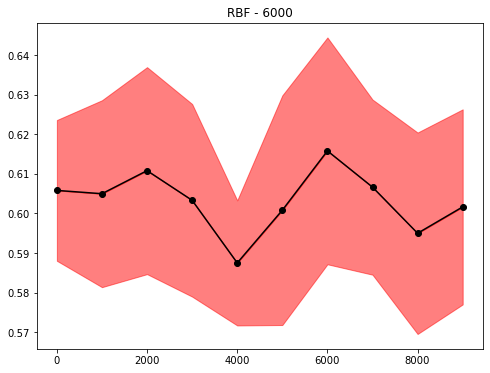

In [10]:
tuner = ModelTunerCV(datasets_classification[0][1], RBFClassifier(),reg_factor=np.arange(0,10000,1000))
tuner.tune(5).plot('RBF')

In [ ]:
# Tune the model
for ds_name, ds in datasets_classification:
    for model_name, model, range in models_classification:
        tuner = ModelTuner(ds, model)
        tuner.tune()
        tuner.plot()


In [13]:
experiment_classification = ModelEvaluationExperiment(datasets_classification, 'classification')
experiment_classification.start(models_classification)


  0%|          | 0/1 [00:00<?, ?it/s]Fitting 5 folds for each of 50 candidates, totalling 250 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    1.3s finished

100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

  0%|          | 0/1 [00:00<?, ?it/s][Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    0.7s finished

100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

  0%|          | 0/1 [00:00<?, ?it/s][Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    0.5

In [ ]:
experiment_classification.plot_final_scores()


In [ ]:
experiment_regression = ModelEvaluationExperiment(datasets_classification, 'regression')
experiment_regression.start(models_regression)


In [ ]:
experiment_regression.plot_final_scores()

In [46]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])